## Assignment 7
Implement binary SVM to classify MNIST digits 3 and 8 using SMO Algorithm. Use different kernel functions(RBF, Polynomial at least) and generate ROC curve. Strictly divide(60:20:20) the data into train, validation and test splits. Perform all hyper parameter tuning/feature selection on validation data and report accuracy on test split. We suggest you to implement the SMO algorithm by yourself for which 10 bonus points will be given, but if you find it difficult, you are free to use third party implementation".

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


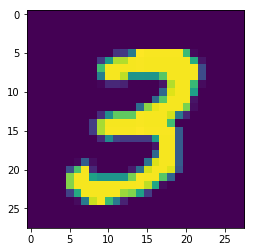

In [39]:
plt.imshow(x_train[7])

In [5]:
y_train[5]

2

In [6]:
X = np.append(x_train,x_test,axis=0)
y = np.append(y_train,y_test,axis=0)

In [7]:
mask = np.logical_or(y==3, y==8)
mask.shape

(70000,)

In [8]:
X = X[mask]
y = y[mask]

In [9]:
X = np.reshape(X, (X.shape[0],-1))

In [10]:
mask_tr = np.random.rand(len(X))<0.6
mask_val = np.logical_and(0.6<=np.random.rand(len(X)), np.random.rand(len(X))<0.8)
mask_te = 0.8<=np.random.rand(len(X))

In [11]:
# print(np.sum(mask_tr), np.sum(mask_val), np.sum(mask_te))

In [12]:
X_train = X[mask_tr]
y_train = y[mask_tr]
X_val = X[mask_val]
y_val = y[mask_val]
X_test = X[mask_te]
y_test = y[mask_te]

## Visualization

In [13]:
# for i in range(5):
#     plt.imshow(X_train[i])
#     print(y_train[i])
#     plt.show()

In [14]:
np.array(np.unique(y, return_counts=True)).T

array([[   3, 7141],
       [   8, 6825]])

In [15]:
# y_bak = np.copy(y)

In [16]:
# y = np.copy(y_bak)

In [17]:
# y[y==3] = -1
# y[y==8] = 1
# y.tolist()
y = np.where(y==3, -1, y) 
y = np.where(y==8, 1, y) 
# y.tolist()

[-1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1

In [18]:
stop

NameError: name 'stop' is not defined

## SVM

In [49]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


In [50]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(X_train, y_train) 
pred = linear_svc.predict(X_test)
print(accuracy_score(y_test, pred))

0.9793553060485332


In [51]:
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train) 
pred = rbf_svc.predict(X_test)
print(accuracy_score(y_test, pred))

/home/subtleseeker/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.971749366171677


In [52]:
poly_svc = svm.SVC(kernel='poly')
poly_svc.fit(X_train, y_train) 
pred = poly_svc.predict(X_test)
print(accuracy_score(y_test, pred))

/home/subtleseeker/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8326693227091634


In [53]:
sigmoid_svc = svm.SVC(kernel='sigmoid')
sigmoid_svc.fit(X_train, y_train) 
pred = sigmoid_svc.predict(X_test)
print(accuracy_score(y_test, pred))

/home/subtleseeker/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.967765302426657


In [46]:
print("Accuracy: " + str(np.mean(scores)))

Accuracy: 0.9590426020080395


In [47]:
scores = cross_val_score(clf, X_val, y_val, cv=5)
scores   
print("Accuracy: " + str(np.mean(scores)))

Accuracy: 0.9590426020080395


In [ ]:
# #Input data
# x = np.array([
#     [-2,4,-1],
#     [4,1,-1],
#     [1, 6, -1],
#     [2, 4, -1],
#     [6, 2, -1],

# ])


# #output label
# y = np.array([-1, -1, 1, 1, 1])

In [ ]:
# for val, inp in enumerate(x):
#     if y[val] == -1:
#         plt.scatter(inp[0], inp[1], s=100, marker='_', linewidths=5)
#     else:
#         plt.scatter(inp[0], inp[1], s=100, marker='+', linewidths=5)

# plt.plot([-2,6],[6,1])

In [21]:
def svm_function(x,y):
    #initilizing weight
    w = np.zeros(len(x[0]))
    #initialize learning rate
    l_rate = 1
    #epoch
    epoch = 1000
    #output list
    out = []
    #training svm
    for e in range(epoch):
        print(e)
        for i, val in enumerate(x):
            val1 = np.dot(x[i], w)
            if (y[i]*val1 < 1):
                w = w + l_rate * ((y[i]*x[i]) - (2*(1/epoch)*w))
            else:
                w = w + l_rate * (-2*(1/epoch)*w)
    
    for i, val in enumerate(x):
        out.append(np.dot(x[i], w))
    
    return w, out

In [22]:
w, out = svm_function(X_train,y_train)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [23]:
print('Calculated weights')
print(w)

Calculated weights
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.000

In [24]:
print('predicted output')
print(out)

predicted output
[6.553219784670609, 7.251908098201799, 5.063800713544278, 4.693977037812221, 5.703694612630895, 5.205835049031476, 3.4835882483852894, 5.636295707940366, 4.238068324445175, 3.6329245885275965, 4.506719532330048, 8.139030368257693, 5.144896571018128, 5.358025126643128, 4.331727332469134, 3.407305229401726, 6.251099109181187, 4.005558337705504, 3.427399146000319, 5.32893560293134, 4.799876019042086, 4.398127177324174, 4.180669489443205, 4.193366715766592, 7.512155239390936, 4.187607827293787, 4.888136868812755, 5.569762382928364, 4.259167509750836, 2.771245196726473, 4.845508933366125, 5.664955530123034, 4.342627769266727, 2.6370482148921353, 3.906511737981952, 5.385604634476545, 3.5748477743312757, 4.8535427478311695, 4.881159200262614, 3.0803409952344456, 5.054188046099782, 4.1205659652520605, 5.09917689424577, 2.5496167397058995, 1.0413793526067368, 2.9361494765220844, 4.0274744391957835, 4.076466750323686, 2.860967616778142, 4.885827808535469, 5.147539333769165, 3.97

In [32]:
u = []
for i, val in enumerate(X_test):
    u.append(np.dot(X_test[i], w))

In [33]:
u

[5.063800713544278,
 4.496192899186938,
 8.139030368257693,
 4.843436397371316,
 4.888136868812755,
 4.845508933366125,
 4.8535427478311695,
 6.3418687815488255,
 5.054188046099782,
 5.473979895169198,
 2.5496167397058995,
 5.645597820380387,
 4.0274744391957835,
 4.7390252748163615,
 4.637213164161855,
 5.683016126711696,
 5.500797734738461,
 4.551455110946673,
 4.1554511703616175,
 3.001054610717855,
 4.22615611830906,
 3.665714666192268,
 3.5116564161898083,
 2.8837788317429243,
 5.150314528212054,
 4.076503252653701,
 3.4224114157994414,
 5.984438700643823,
 3.303720828782812,
 2.589295796424851,
 4.939389412365539,
 5.684097239910254,
 5.974695823849922,
 5.269772705316743,
 6.557288210923937,
 3.6029418943583513,
 5.572730559379575,
 4.701050685801885,
 5.630422045535778,
 3.628326548669893,
 5.416805864574517,
 4.375742392207906,
 9.527797650564919,
 2.8783560213016073,
 3.7184158028974537,
 4.996315983118015,
 4.147872400152506,
 4.349829867413636,
 4.417094163424809,
 3.691476

In [34]:
u = np.array(u)
u[u>1] = 1
u[u<=1] = -1

In [35]:
u.tolist()

[-1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,

In [ ]:
u = np.array([
    [-1,3,-1],
    [5,5,-1],
    
])
   
    
for val, inp in enumerate(x):
    if y[val] == -1:
        plt.scatter(inp[0], inp[1], s=100, marker='_', linewidths=5)
    else:
        plt.scatter(inp[0], inp[1], s=100, marker='+', linewidths=5)

plt.scatter(-1,3, s=100, marker='_', linewidths=5)   
plt.scatter(5,5, s=100, marker='+', linewidths=5)   


x1=[w[0],w[1],-w[1],w[0]]
x2=[w[0],w[1],w[1],-w[0]]

x1x2 =np.array([x1,x2])
X,Y,U,V = zip(*x1x2)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')

In [ ]:
u = np.array([
    [-1,3,-1],
    [5,5,-1],
    
])

In [ ]:
result = []
for i, val in enumerate(u):
        result.append(np.dot(u[i], w))

In [ ]:
print('test result')
print(result)

In [ ]:
# # Function to initialise parameter size
# def paramsize(X):    # returns n & m
#     print(X.shape)
#     m=X.shape[0]
#     n=X.shape[1]
#     print("No of Training Examples :",m,"\nNo of Features :",n)
#     return n,m
# # Function to initialize weight parameters
# def initParam(n):
#     return np.zeros((n,1))
# def compute(X,weights,lambd):    # Weights :(n,1) # X :(m,n)
#     return np.dot(X,weights) + np.sum(lambd*(weights**2))  # Returns Y-Hat or Predicted value in array of size : (m,1)
# def compute_cost(Y,pred):  # Y:(m,1) pred(m,1)
#     value=Y*pred
#     if value >1:
#         cost=0
#     else :
#         cost=1-value
#     return cost

# def svm(X,Y,epochs=1000,lr=1):    # X:(m,n) Y:(m,1)
#     n,m=paramsize(X)
#     w=initParam(n)       # w:(n,1)
#     for iter in range(1,epochs):
#         for i,x in enumerate(X):
#             x_train=x.reshape(1,-1)    #(1,n)
#             pred=compute(x_train,w,1/iter)  #(1,1)
#             cost=compute_cost(Y[i].reshape(1,1),pred)
#             if(iter%100==0):
#                 print("\nCost at ",iter," iteration of ",i,"Training Example : ",cost)
                
#             if cost==0:
#                 grad=np.zeros(w.shape)
#             else:
#                 grad=(-Y[i].reshape(1,1)*x_train).T
#             grad=grad+2/iter*w
#             w=w-lr*grad
#     return w


In [ ]:
# X = np.array([
#     [-2,4,-1],
#     [4,1,-1],
#     [1, 6, -1],
#     [2, 4, -1],
#     [6, 2, -1],

# ])

# y = np.array([-1,-1,1,1,1]).reshape(-1,1)

In [ ]:
# print(X_train.shape,y_train.shape)
# u = np.reshape(X_train, (X_train.shape[0],-1))
# w=svm(u,y)

In [ ]:
# print(w)

In [ ]:
from IPython.display import Audio
s = '/home/subtleseeker/beep.wav'
Audio(s, autoplay=True)

In [ ]:
import os
os.system("printf '\a'")

In [ ]:
w_bak = w

In [ ]:
pred=compute(X_test.reshape(X_test[0],-1),w,0)  #(1,1)
# cost=compute_cost(y_test.reshape(1,1),pred)
pred

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # train
    def fit(self, data):
        self.data = data
        # { ||w||: [w,b] }
        opt_dict = {}

        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1
        

        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,
                      ]

        
        
        # extremely expensive
        b_range_multiple = 2
        # we dont need to take as small of steps
        # with b as we do w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10
        
        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    #print(xi,':',yi*(np.dot(w_t,xi)+b))
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            
        for i in self.data:
            for xi in self.data[i]:
                yi=i
                print(xi,':',yi*(np.dot(self.w,xi)+self.b))            

    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        return classification

    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]

        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')

        plt.show()
        
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

svm = Support_Vector_Machine()
svm.fit(data=data_dict)

predict_us = [[0,10],
              [1,3],
              [3,4],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8]]

for p in predict_us:
    svm.predict(p)

svm.visualize()